# Loading packages

In [1]:
#Comment out the other paths and comment in your path
path = r'C:\Users\heuse\Desktop\SE_Risk_Management-1/' #Daniel Path
#path = '/Users/mandoholzknecht/SE_Risk_Management/' # Path Mando
#path = 'C:/Users/Fabio/OneDrive/Dokumente/Uni Innsbruck/WS20/Applied risk mgmt/SE/Heusli/SE_Risk_Management/' # Path Fabio

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.anova as anova
import scipy as sci

from sklearn import metrics

from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, precision_recall_curve, auc
from sklearn.feature_selection import f_classif
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from scipy.stats import chi2_contingency
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import datetime


# Loading the data

Loading the Training dataset + Test dataset

In [2]:
# use the realtive path finding
df_train = pd.read_csv(path + 'Training_Dataset.csv', sep=';', index_col=None)
df_test = pd.read_csv(path + 'Test_Dataset.csv', sep=';', index_col=0)

df_train.head(10)

,id,default,legal_form,zip_code,sector,year_inc,count_emp,type_pl,sales,gross_performance,...,bonds_payables_lt,total_equity,current_assets,monetary_current_assets,cash,trade_receivables_st,trade_receivables_lt,cf_operating,cf_investment,cf_financing
0,C_405,0,GmbH & Co. KG,12359,46730,1900,NaN,GKV,1.068738e+08,1.068738e+08,...,NaN,3.224471e+07,3.783199e+07,1.711147e+07,10297047.50,NaN,NaN,6.986094e+06,-1.112342e+06,-7520392.09
1,C_292,0,GmbH & Co. KG,10719,70101,1976,NaN,GKV,1.393869e+06,1.407889e+06,...,NaN,4.508026e+06,4.669179e+06,9.278377e+05,926383.75,NaN,NaN,-4.343980e+06,1.174427e+06,1128108.08
2,C_746,0,GmbH,13353,87100,1962,323.0,GKV,3.864034e+06,7.597353e+05,...,NaN,5.164048e+04,2.810119e+07,1.111696e+07,9146283.79,617816.28,NaN,9.548544e+06,-7.536444e+06,-22026.07
3,C_838,0,AG,12529,68320,1972,1.0,GKV,4.384786e+06,4.405058e+06,...,NaN,1.182011e+07,8.238474e+06,7.519183e+06,6890565.23,319848.26,NaN,1.715799e+06,-6.561222e+05,-169655.66
4,C_495,0,Einzelfirma,12165,47730,1908,NaN,GKV,1.104478e+08,1.104478e+08,...,NaN,4.547445e+08,3.546565e+07,8.545184e+06,5036615.09,516646.73,NaN,1.301809e+08,-1.419776e+08,12567030.80
5,C_494,0,GmbH,13055,68201,1990,415.0,GKV,4.518042e+04,4.518042e+04,...,NaN,7.953387e+04,8.484770e+04,8.061511e+04,75679.79,NaN,NaN,1.800497e+04,-3.787100e+02,0.00
6,C_300,0,GmbH,10969,68200,1991,2.0,GKV,1.508435e+08,1.479894e+08,...,NaN,6.657375e+08,8.479909e+07,3.142807e+07,11542490.91,326731.07,8000.0,4.007555e+07,-8.337054e+06,-34594274.52
7,C_453,0,GmbH,16792,78100,1991,NaN,GKV,2.843420e+08,2.843420e+08,...,NaN,2.883814e+09,4.229090e+08,4.312550e+08,21696000.00,448000.00,NaN,5.861770e+08,-7.339750e+08,-95826000.00
8,C_924,0,GmbH,13125,86101,1991,283.0,GKV,9.811591e+06,9.681040e+06,...,NaN,2.032968e+07,7.366730e+06,5.421665e+06,322573.88,372298.68,NaN,4.369386e+05,-1.879056e+06,-13729379.17
9,C_976,0,GmbH,12681,71122,1999,NaN,GKV,1.384595e+05,1.384595e+05,...,NaN,1.552805e+06,4.966969e+05,4.500943e+04,35726.57,NaN,NaN,1.947540e+05,3.318306e+05,-798859.83


# Understanding your data


## Univartiate descriptive anaylsis

The datatype of the variables is important as in dermines how you have to look at the data

In [3]:
catvar = [i for i in list(df_train.columns) if df_train[i].dtype=='O']
catvar # categorial variables

['id', 'legal_form', 'type_pl']

In [4]:
numvar = [i for i in list(df_train.columns) if df_train[i].dtype in ['float64','int64']]
numvar # numberical variables

['default',
 'zip_code',
 'sector',
 'year_inc',
 'count_emp',
 'sales',
 'gross_performance',
 'gross_profit',
 'earn_from_op',
 'fin_result',
 'oth_interest_inc',
 'oth_interest_exp',
 'result_from_ord_bus',
 'total_result',
 'annual_profit',
 'total_assets',
 'total_liabilities_st',
 'total_liabilities_mt',
 'total_liabilities_lt',
 'bank_liabilities_st',
 'bank_liabilities_mt',
 'bank_liabilities_lt',
 'trade_payables_st',
 'trade_payables_mt',
 'trade_payables_lt',
 'bonds_payables_st',
 'bonds_payables_mt',
 'bonds_payables_lt',
 'total_equity',
 'current_assets',
 'monetary_current_assets',
 'cash',
 'trade_receivables_st',
 'trade_receivables_lt',
 'cf_operating',
 'cf_investment',
 'cf_financing']

## Missing values

Overview of missing values in the data

In [5]:
df_train.isnull().sum().sort_values(ascending=False)

bonds_payables_st          669
bonds_payables_lt          669
trade_payables_lt          665
bonds_payables_mt          664
trade_payables_mt          648
trade_receivables_lt       645
bank_liabilities_lt        545
bank_liabilities_mt        483
trade_receivables_st       355
count_emp                  353
bank_liabilities_st        352
trade_payables_st          143
oth_interest_inc           127
oth_interest_exp            62
cash                        32
fin_result                  22
total_equity                21
gross_profit                 7
gross_performance            7
result_from_ord_bus          1
sales                        1
earn_from_op                 1
cf_financing                 1
annual_profit                1
total_assets                 1
cf_investment                1
current_assets               1
cf_operating                 1
sector                       0
zip_code                     0
legal_form                   0
default                      0
year_inc

In [6]:
df_test.isnull().sum().sort_values(ascending=False)

bonds_payables_lt          330
bonds_payables_st          330
trade_payables_lt          330
bonds_payables_mt          329
trade_payables_mt          322
trade_receivables_lt       320
bank_liabilities_lt        250
bank_liabilities_mt        230
count_emp                  179
bank_liabilities_st        172
trade_receivables_st       169
trade_payables_st           65
oth_interest_inc            62
oth_interest_exp            23
cash                        18
total_equity                 9
fin_result                   8
gross_performance            3
gross_profit                 3
cf_investment                1
cf_operating                 1
cf_financing                 1
earn_from_op                 0
year_inc                     0
sector                       0
type_pl                      0
sales                        0
zip_code                     0
total_liabilities_mt         0
result_from_ord_bus          0
total_result                 0
annual_profit                0
total_as

# Variables

Variable coding and transforming variables

In [7]:
# drop companies with to many null columns 
df_train = df_train.loc[df_train["id"] != 'C_620'] 

# get total liabilities
df_train['total_liabilities'] = df_train['total_liabilities_st'] + df_train['total_liabilities_mt'] + df_train['total_liabilities_lt']
df_test['total_liabilities'] = df_test['total_liabilities_st'] + df_test['total_liabilities_mt'] + df_test['total_liabilities_lt']

### Age columns
Transforming the year of incorporation variable to two age variables: one numerical (age_num) one and one categorical one (age_cat). 

\begin{equation*}
Age = Todays\ Year - Year\ Inc.
\end{equation*}

In [8]:
df_train['age_num'] = datetime.datetime.now().year - df_train["year_inc"]
df_train.sort_values(by="age_num",ascending=False).head(5)

#For the test data
df_test['age_num'] = datetime.datetime.now().year - df_test["year_inc"]

As we have some firms which are pretty old (some > 100 years) and two outliers (2020s) we can set their value to the e.g.: 95% quantile as this shouldn't change the meaning of the age variable that much. They are long on the market and it does not really matter if they are long on the market (e.g.: 100 years) or very very long in the business (eg: above 500 years). 

In [9]:
#take a look on the quantiles
quantiles = list()
for i in range(0,100,):
    quantiles.append(df_train["age_num"].quantile(i/100))

age_th = df_train["age_num"].quantile(0.99)

#replace outliers with 99% quantile
df_train.loc[df_train["age_num"] > age_th,"age_num"] = age_th

df_train.sort_values(by="age_num",ascending=False).head(10)

# For the test data
quantiles = list()
for i in range(0,100,):
    quantiles.append(df_test["age_num"].quantile(i/100))

age_th = df_test["age_num"].quantile(0.99)

#replace outliers with 99% quantile
df_test.loc[df_test["age_num"] > age_th,"age_num"] = age_th

df_train["age_quartile"] = pd.qcut(df_train["age_num"],10)
pd.crosstab(df_train["default"],df_train["age_quartile"])

age_quartile,"(9.999, 13.0]","(13.0, 16.0]","(16.0, 20.0]","(20.0, 23.0]","(23.0, 25.0]","(25.0, 29.0]","(29.0, 32.0]","(32.0, 42.6]","(42.6, 66.0]","(66.0, 158.33]"
default,,,,,,,,,,
0,69,61,75,78,36,67,63,54,65,62
1,5,1,3,6,4,0,7,5,3,4


### Profit Margin

\begin{equation*}
Profit\ Margin = \frac{Gross\ Profit}{Sales}
\end{equation*}


In [10]:
# replace NaN's by 0.5% quantil
df_train['gross_profit'] = df_train['gross_profit'].replace(np.nan, np.quantile(df_train['gross_profit'].dropna(),.5))

# calculate margin and winsorize outliers
df_train['profit_margin'] = df_train['gross_profit']/df_train['sales']
df_train['profit_margin'] = sci.stats.mstats.winsorize(df_train['profit_margin'], limits =[0.0, 0.025])

# same procedure for test
df_test['gross_profit'] = df_test['gross_profit'].replace(np.nan, np.quantile(df_test['gross_profit'].dropna(),.5))
df_test['profit_margin'] = df_test['gross_profit']/df_test['sales']
df_test['profit_margin'] = sci.stats.mstats.winsorize(df_test['profit_margin'], limits =[0.0, 0.025])

### Equity Ratio 

\begin{equation*}
Equity\ Ratio = \frac{Total\ Equity}{Total\ Assets}
\end{equation*}


In [11]:
# data cleaning and ratio calculation
np.where(df_train['total_equity'] > 1, df_train['total_equity'], 0)
df_train.loc[df_train.total_equity.isnull(), 'total_equity'] = df_train['total_assets'] - df_train['total_liabilities']
df_train['equity_ratio'] = df_train['total_equity']/df_train['total_assets']

# same procedure for test
np.where(df_test['total_equity'] > 1, df_test['total_equity'], 0)
df_test.loc[df_test.total_equity.isnull(), 'total_equity'] = df_test['total_assets'] - df_test['total_liabilities']
df_test['equity_ratio'] = df_test['total_equity']/df_test['total_assets']

### Quick ratio

In [12]:
# replace NaNs for cash by monetary current assets
df_train.loc[df_train['cash'].isnull(), 'cash'] = df_train['monetary_current_assets']

# quick ratio
df_train['quick_ratio'] = df_train['cash']/df_train['total_liabilities_st']
df_train['quick_ratio'] = sci.stats.mstats.winsorize(df_train['quick_ratio'], limits =[0.01, 0.1])

# same procedure for test
df_test.loc[df_test['cash'].isnull(), 'cash'] = df_test['monetary_current_assets']
df_test['quick_ratio'] = df_test['cash']/df_test['total_liabilities_st']
df_test['quick_ratio'] = sci.stats.mstats.winsorize(df_test['quick_ratio'], limits =[0.01, 0.1])

### Interest Coverage Ratio

\begin{equation*}
Interest\ Coverage\ Ratio = \frac{Operating\ Income}{Interest\ Expenses}
\end{equation*}

In [13]:
# replace NaNs for oth interst exp by balance sheet operations
df_train.loc[df_train['fin_result'].isnull(), 'fin_result'] = df_train['total_result'] - df_train['earn_from_op']
df_train.loc[df_train['oth_interest_exp'].isnull(), 'oth_interest_exp'] = df_train['oth_interest_inc'] - df_train['fin_result']
df_train.loc[df_train['oth_interest_exp'].isnull(), 'oth_interest_exp'] = df_train['fin_result']

# data cleaning, ratio calculation and winsorizing of outliers
df_train['icr_ratio'] = df_train['earn_from_op']/df_train['oth_interest_exp']
df_train['icr_ratio'] = sci.stats.mstats.winsorize(df_train['icr_ratio'], limits =[0.05, 0.16])

# # same procedure for test
df_test.loc[df_test['fin_result'].isnull(), 'fin_result'] = df_test['total_result'] - df_test['earn_from_op']
df_test.loc[df_test['oth_interest_exp'].isnull(), 'oth_interest_exp'] = df_test['oth_interest_inc'] - df_test['fin_result']
df_test.loc[df_test['oth_interest_exp'].isnull(), 'oth_interest_exp'] = df_test['fin_result']
df_test['icr_ratio'] = df_test['earn_from_op']/df_test['oth_interest_exp']
df_test['icr_ratio'] = sci.stats.mstats.winsorize(df_test['icr_ratio'], limits =[0.05, 0.16])

### Return on Assets

\begin{equation*}
ROA = \frac{Annual\ Profit}{Total\ Assets}
\end{equation*}


In [14]:
# ratio calculation and winsorizing of outliers
df_train['roa'] = df_train['result_from_ord_bus']/df_train['total_assets']
df_train['roa'] = sci.stats.mstats.winsorize(df_train['roa'], limits =[0.03, 0.05])

# same procedure for test
df_test['roa'] = df_test['result_from_ord_bus']/df_test['total_assets']
df_test['roa'] = sci.stats.mstats.winsorize(df_test['roa'], limits =[0.03, 0.05])

### Working Capital Ratio

In [15]:
# ratio calculation and winsorizing of outliers
df_train['wc_ratio'] = df_train['current_assets']/df_train['total_liabilities_st']
df_train['wc_ratio'] = sci.stats.mstats.winsorize(df_train['wc_ratio'], limits =[0, 0.1])

# same procedure for test
df_test['wc_ratio'] = df_test['current_assets']/df_test['total_liabilities_st']
df_test['wc_ratio'] = sci.stats.mstats.winsorize(df_test['wc_ratio'], limits =[0, 0.01])

In [16]:
# # Dept-to-equity kick out
# df_train['debt_to_equity'] = np.where(df_train['total_equity'] > 1, df_train['total_liabilities']/df_train['total_equity'], 0)
# df_train['debt_to_equity'] = sci.stats.mstats.winsorize(df_train['debt_to_equity'], limits =[0.0, 0.02])

# df_test['debt_to_equity'] = np.where(df_test['total_equity'] > 1, df_test['total_liabilities']/df_test['total_equity'], 0)

In [17]:
# # Ebit margin kick out
# df_train['ebit_margin'] = df_train['earn_from_op']/df_train['sales']
# df_train['ebit_margin'] = sci.stats.mstats.winsorize(df_train['ebit_margin'], limits =[0.02, 0.01])

# df_test['ebit_margin'] = df_test['earn_from_op']/df_test['sales']
# df_test['ebit_margin'] = sci.stats.mstats.winsorize(df_test['ebit_margin'], limits =[0.02, 0.01])

In [18]:
# # neue ratio kick out
# df_train['neu'] = df_train['earn_from_op']/df_train['result_from_ord_bus']
# df_train['neu'] = sci.stats.mstats.winsorize(df_train['neu'], limits =[0.1, 0.1])
# plt.boxplot(df_train['neu'])
# plt.show()

### Boxplots for Ratios

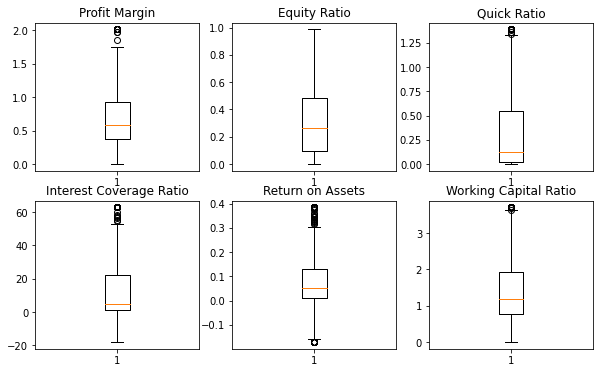

In [19]:
f, ax = plt.subplots(2, 3, figsize=(10, 6))

ax[0,0].boxplot(df_train['profit_margin'])
ax[0,0].set_title('Profit Margin')
ax[0,1].boxplot(df_train['equity_ratio'])
ax[0,1].set_title('Equity Ratio')
ax[0,2].boxplot(df_train['quick_ratio'])
ax[0,2].set_title('Quick Ratio')
ax[1,0].boxplot(df_train['icr_ratio'])
ax[1,0].set_title('Interest Coverage Ratio')
ax[1,1].boxplot(df_train['roa'])
ax[1,1].set_title('Return on Assets')
ax[1,2].boxplot(df_train['wc_ratio'])
ax[1,2].set_title('Working Capital Ratio')
plt.show()

## Univariate Analysis

### Univariate Logit Regressions
See the significance of every variable possible in the training set in an univariate setting and where NAs are dropped. We also ordered them according to their p values. Important to note here is the p value is not a KO-criteria for us. Also we do these regressions before data cleansing, which is another important thing to consider. The aim of this is only to see if their is some clear evidence for significant features in the data in the first place.

In [20]:
col_list = df_train.columns[2:]
col_list
dictionary_logit = dict()

for i in range(0,len(col_list)):
    try:
        univ_var = pd.concat((df_train['default'],df_train[col_list[i]]),axis=1)
        y = univ_var["default"]
        X = univ_var.iloc[:,1]
        X = sm.add_constant(X)
        model = sm.Logit(y,X,missing="drop").fit(disp=False,maxiter=100)
        #print(model.summary2()) #comment that out if you don't want to see the regression summary
        pvalue = model.pvalues[1]
        dictionary_logit[col_list[i]] = (pvalue,univ_var.iloc[:,1].isnull().sum())
    except:
        continue

In [21]:
dictionary_logit = pd.DataFrame.from_dict(dictionary_logit,orient="index",columns=['P-Value','NAs']).sort_values(by="P-Value")
dictionary_logit

,P-Value,NAs
equity_ratio,0.000102,0
quick_ratio,0.002836,0
icr_ratio,0.009120,0
wc_ratio,0.025687,0
cash,0.031590,0
year_inc,0.055778,0
total_equity,0.080663,0
roa,0.095320,0
gross_profit,0.157463,0
profit_margin,0.166417,0


Speaking in an univariate context, what we can see here is that no variable shows a very strong significance in the univariate logistic regression with the default variable as dependent variable. Also some variables can be disregarded as their numerical value makes no sense (e.g.: year_inc).  Thus we can argue, that a focus on economic reasoning instead of p-values in the univariate context is a better way to go. 

### Mann-Whitney U Test
Also we perform a Mann-Whitney U Test for all variables to see if there is a difference in those variables between default and non default firms.

In [22]:
col_list

dictionary_mannu = dict()

for i in range(0,len(col_list)):
    try: 
        group_default = df_train[df_train["default"]==1][col_list[i]]
        group_non_default = df_train[df_train["default"]==0][col_list[i]]
        test_stat, pvalue = sci.stats.mannwhitneyu(group_default,group_non_default)
        dictionary_mannu[col_list[i]] = test_stat, pvalue, df_train[col_list[i]].isnull().sum()
    except:
        continue


In [23]:
dictionary_mannu = pd.DataFrame.from_dict(dictionary_mannu,orient="index",
                       columns=['Test statistic','P-Value','NAs']).sort_values(by="P-Value")
dictionary_mannu

,Test statistic,P-Value,NAs
quick_ratio,6586.0,0.000002,0
equity_ratio,6800.0,0.000004,0
total_equity,7142.0,0.000015,0
cash,7196.0,0.000018,0
trade_receivables_lt,8295.0,0.000735,644
trade_payables_lt,8433.0,0.001102,664
bonds_payables_st,8470.0,0.001226,668
bonds_payables_lt,8470.0,0.001226,668
monetary_current_assets,8691.0,0.002271,0
bonds_payables_mt,8853.0,0.003492,663


In [24]:
#merge both results together
summary = pd.concat((dictionary_logit.iloc[:,0],dictionary_mannu.iloc[:,1:]),axis=1,)
summary.columns = ["P-Value Univ. Logit","P-Value MannU","NAs"]
summary

,P-Value Univ. Logit,P-Value MannU,NAs
equity_ratio,0.000102,0.000004,0
quick_ratio,0.002836,0.000002,0
icr_ratio,0.009120,0.014473,0
wc_ratio,0.025687,0.009431,0
cash,0.031590,0.000018,0
year_inc,0.055778,0.255359,0
total_equity,0.080663,0.000015,0
roa,0.095320,0.073229,0
gross_profit,0.157463,0.011038,0
profit_margin,0.166417,0.070632,0


### Categorical Variables

In [25]:
catvar = [i for i in list(df_train.columns)[1:] if df_train[i].dtype=='O']

for i in catvar:
    tmp1 = pd.crosstab(df_train['default'], df_train[i]).apply(lambda x: np.round(x/x.sum() * 100,2)).T.sort_values(by = i ,ascending=False)
    tmp2 = pd.crosstab(df_train['default'], df_train[i]).T.rename(columns={False: 'N_False', True: 'N_True'})
    tmp3 = pd.DataFrame(tmp2.apply(sum, axis=1), columns=['N'])
    tmp4 = tmp3.apply(lambda x: np.round(x/x.sum() * 100,2)).rename(columns={'N': 'N_Perc'})
    tmp = tmp1.join(tmp2).join(tmp3).join(tmp4)
    print('====================================================')
    print('Variable: ',i)
    print('---------------------------------------------------')
    print(tmp)
    print()
    del tmp1, tmp2, tmp3, tmp4, tmp

Variable:  legal_form
---------------------------------------------------
                              0      1  N_False  N_True    N  N_Perc
legal_form                                                          
Verein                   100.00   0.00        1       0    1    0.15
Sonst. Gewerbetreibende   88.24  11.76       15       2   17    2.54
OHG                      100.00   0.00        4       0    4    0.60
KG                        80.00  20.00        4       1    5    0.75
GmbH & Co. KG             91.67   8.33       88       8   96   14.37
GmbH                      95.04   4.96      460      24  484   72.46
Genossenschaft           100.00   0.00       15       0   15    2.25
Freiberufler              80.00  20.00        4       1    5    0.75
Einzelfirma               88.89  11.11        8       1    9    1.35
BGB-Gesellschaft         100.00   0.00        4       0    4    0.60
AG                        96.43   3.57       27       1   28    4.19

Variable:  type_pl
---------

# Our Variables of interest
In this section we want to focus on our variables of interest, which are mainly choosen because of economic reasoning. These are:
- Profit Margin
- Equity Ratio
- Qick Ratio
- Interest Coverage Ratio
- Return on Assets
(- Working Capital Ratio)

## Results of both univariate Tests

As already stated before, economic reasoning is our main argument to choose a variable for our regression. Nevertheless it is important to see the results of the univariate tests in the section before.

In [26]:
col_list = ['profit_margin', 'equity_ratio', 'quick_ratio', 'icr_ratio', 'roa', 'wc_ratio']
summary.loc[col_list,:]

,P-Value Univ. Logit,P-Value MannU,NAs
profit_margin,0.166417,0.070632,0
equity_ratio,0.000102,0.000004,0
quick_ratio,0.002836,0.000002,0
icr_ratio,0.009120,0.014473,0
roa,0.095320,0.073229,0
wc_ratio,0.025687,0.009431,0


## Visualize differences in our variables of interest between default and non default 

Here we just want to visualize the difference in our variables of interest between default and non default firms in our training dataset.

In [27]:
col_list = ['default', 'profit_margin', 'equity_ratio', 'quick_ratio', 'icr_ratio', 'roa', 'wc_ratio']
df_train[col_list]

,default,profit_margin,equity_ratio,quick_ratio,icr_ratio,roa,wc_ratio
0,0,0.361114,7.385670e-01,1.386506,15.436676,0.180537,3.710767
1,0,1.104725,3.896983e-01,0.131683,8.723286,0.095967,0.663710
2,0,2.012151,9.370190e-04,1.083222,62.850328,0.001684,3.328108
3,0,2.012151,5.925318e-01,1.386506,62.850328,0.030412,3.193566
4,0,1.135876,4.174963e-01,0.014493,5.077795,0.040158,0.102055
...,...,...,...,...,...,...,...
664,0,0.506472,1.823358e-01,0.003054,0.939698,-0.001518,0.835583
665,0,0.446851,3.418227e-01,0.276975,57.003692,0.173649,1.213142
666,0,1.000000,-3.086604e-17,0.003809,1.613677,0.013497,0.041927
667,0,1.049012,-1.273479e-16,0.049301,3.869858,0.063753,0.615002


### Age

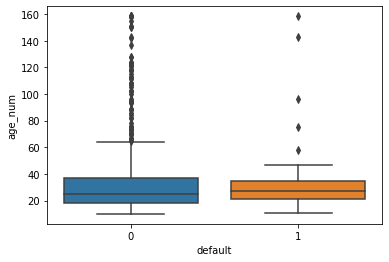

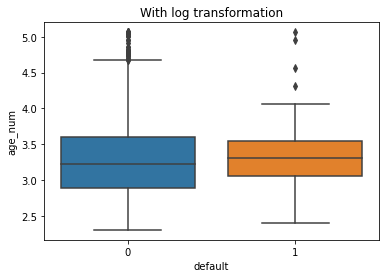

<Figure size 432x288 with 0 Axes>

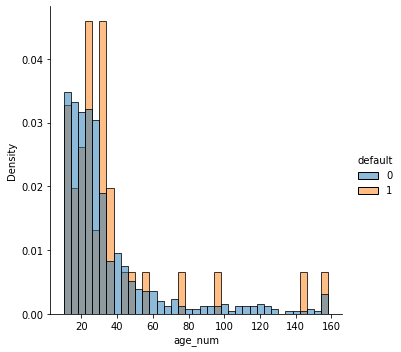

In [28]:
sns.boxplot(y="age_num",x="default",data=df_train);
plt.figure()
sns.boxplot(y=np.log(df_train["age_num"]),x="default",
            data=df_train).set_title("With log transformation");
plt.figure()
sns.displot(df_train,x="age_num",hue="default",stat="density",common_norm=False);

### Cash

In [29]:
sns.boxplot(y="cash",x="default",data=df_train);
plt.figure()
sns.boxplot(y=np.log(df_train["cash"]),x="default",
            data=df_train).set_title("With log transformation");
plt.figure()
sns.displot(df_train,x=np.log(df_train["cash"]),hue="default",stat="density",common_norm=False)
plt.title("Log transformed");

ValueError: autodetected range of [-inf, 19.361787456416504] is not finite

### Profit Margin

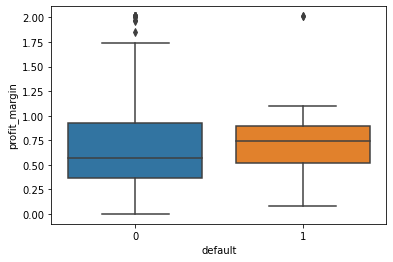

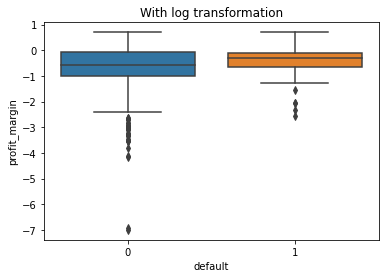

<Figure size 432x288 with 0 Axes>

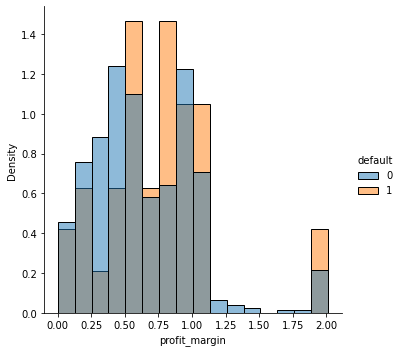

In [30]:
sns.boxplot(y="profit_margin",x="default",data=df_train);
plt.figure()
sns.boxplot(y=np.log(df_train["profit_margin"]),x="default",
            data=df_train).set_title("With log transformation");
plt.figure()
sns.displot(df_train,x="profit_margin",hue="default",stat="density",common_norm=False);

### Ebit Margin

In [31]:
sns.boxplot(y="ebit_margin",x="default",data=df_train);
plt.figure()
sns.boxplot(y=np.log(df_train["ebit_margin"]),x="default",
            data=df_train).set_title("With log transformation");
plt.figure()
sns.displot(df_train,x="ebit_margin",hue="default",stat="density",common_norm=False);

ValueError: Could not interpret input 'ebit_margin'

### Working Capital Ratio

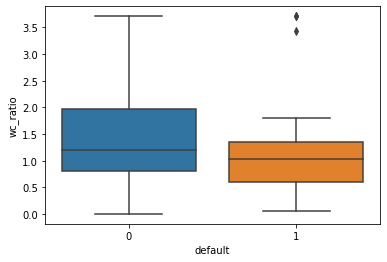

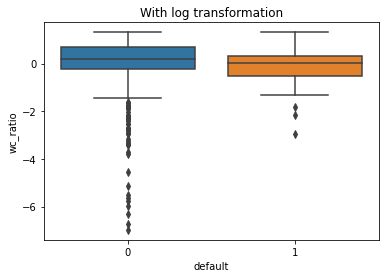

<Figure size 432x288 with 0 Axes>

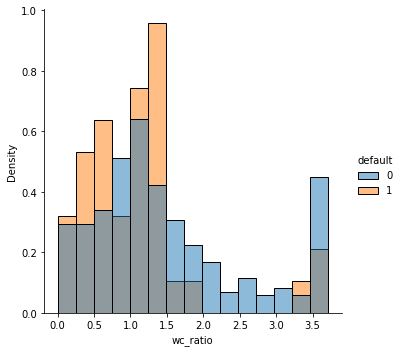

In [32]:
sns.boxplot(y="wc_ratio",x="default",data=df_train);
plt.figure()
sns.boxplot(y=np.log(df_train["wc_ratio"]),x="default",
            data=df_train).set_title("With log transformation");
plt.figure()
sns.displot(df_train,x="wc_ratio",hue="default",stat="density",common_norm=False);

### Operating Cash Flow Ratio

In [33]:
sns.boxplot(y="ocf_ratio",x="default",data=df_train);
plt.figure()
sns.boxplot(y=np.log(df_train["ocf_ratio"]),x="default",
            data=df_train).set_title("With log transformation");
plt.figure()
sns.displot(df_train,x="ocf_ratio",hue="default",stat="density",common_norm=False);

ValueError: Could not interpret input 'ocf_ratio'

### Equity Ratio 

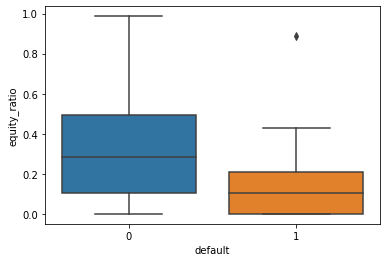

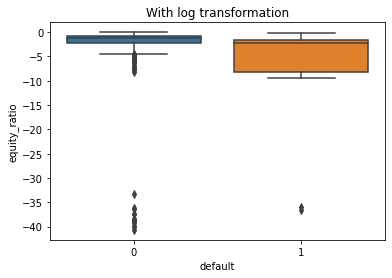

<Figure size 432x288 with 0 Axes>

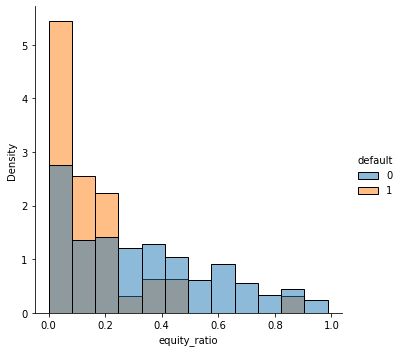

In [34]:
sns.boxplot(y="equity_ratio",x="default",data=df_train);
plt.figure()
sns.boxplot(y=np.log(df_train["equity_ratio"]),x="default",
            data=df_train).set_title("With log transformation");
plt.figure()
sns.displot(df_train,x="equity_ratio",hue="default",stat="density",common_norm=False);

### Debt-to-Equity Ratio

In [35]:
sns.boxplot(y="debt_to_equity",x="default",data=df_train);
plt.figure()
sns.boxplot(y=np.log(df_train["debt_to_equity"]),x="default",
            data=df_train).set_title("With log transformation");
plt.figure()
data = df_train[df_train["debt_to_equity"] < 50]
sns.displot(data,x="debt_to_equity",hue="default",stat="density",common_norm=False)
plt.title("Only D/E Ratio up to 50");

ValueError: Could not interpret input 'debt_to_equity'

## Multivariate Analysis - Correlation Matrix/Heatmap

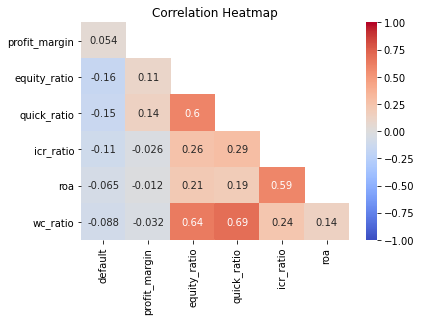

,default,profit_margin,equity_ratio,quick_ratio,icr_ratio,roa
profit_margin,0.053676,1.000000,0.107896,0.144117,-0.025846,-0.011870
equity_ratio,-0.160258,0.107896,1.000000,0.600939,0.261021,0.214094
quick_ratio,-0.145124,0.144117,0.600939,1.000000,0.290439,0.194442
icr_ratio,-0.105542,-0.025846,0.261021,0.290439,1.000000,0.587653
roa,-0.064645,-0.011870,0.214094,0.194442,0.587653,1.000000
wc_ratio,-0.087933,-0.032352,0.639378,0.687871,0.241114,0.141487


In [36]:
data = df_train[col_list]
df_corr = data.corr()
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))
mask = mask[1:, :-1]
corr = pd.DataFrame(df_corr.iloc[1:,:-1].copy())

heatmap = sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, annot=True, cmap="coolwarm")
heatmap.set_title('Correlation Heatmap')
plt.show()

corr

## Univariate Ginis of our Variables of interest
Here we want to calculate the Gini coefficients, resulting from a logit model with only one variable of our interest. 

In [37]:
col_list = ['default', 'profit_margin', 'equity_ratio', 'quick_ratio', 'icr_ratio', 'roa', 'wc_ratio']
df_train[col_list]

,default,profit_margin,equity_ratio,quick_ratio,icr_ratio,roa,wc_ratio
0,0,0.361114,7.385670e-01,1.386506,15.436676,0.180537,3.710767
1,0,1.104725,3.896983e-01,0.131683,8.723286,0.095967,0.663710
2,0,2.012151,9.370190e-04,1.083222,62.850328,0.001684,3.328108
3,0,2.012151,5.925318e-01,1.386506,62.850328,0.030412,3.193566
4,0,1.135876,4.174963e-01,0.014493,5.077795,0.040158,0.102055
...,...,...,...,...,...,...,...
664,0,0.506472,1.823358e-01,0.003054,0.939698,-0.001518,0.835583
665,0,0.446851,3.418227e-01,0.276975,57.003692,0.173649,1.213142
666,0,1.000000,-3.086604e-17,0.003809,1.613677,0.013497,0.041927
667,0,1.049012,-1.273479e-16,0.049301,3.869858,0.063753,0.615002


In [ ]:
dictionary_univ_gini = dict()
for var in col_list[1:]:
    X = df_train[var]
    y = df_train["default"]
    X = sm.add_constant(X)

    random_numbers = np.random.randint(0,1000000,1000)

    for i in random_numbers:
        try:
            # Splitting data into training and testing sets.
            train_features, test_features, train_labels, test_labels = train_test_split(X, 
                                                                                y, test_size = 0.33, 
                                                                                random_state = i, 
                                                                                stratify = y)
            # The splited Logit Model
            mdl2split = sm.Logit(train_labels,train_features).fit()
            mdl2split.summary2()

            # Predict the test data
            predictions_split = mdl2split.predict(test_features)
            # Predict the training data
            predictions_split_train = mdl2split.predict(train_features)
            # Calculate the absolute errors
            errors = abs(predictions_split - test_labels)
    
            #AUC & Gini Graph + Calculations of splitted logit

            fpr_split, tpr_split, thresholds_split = metrics.roc_curve(test_labels, predictions_split)
            auc_split = metrics.auc(fpr_split, tpr_split) 

            # Predict the in sample (train) data for comparision
            fpr_split_train, tpr_split_train, thresholds_split_train = metrics.roc_curve(train_labels, predictions_split_train)
            auc_split_train = metrics.auc(fpr_split_train, tpr_split_train)
    
            #Store values in dictionary
            dictionary_univ_gini[i] = round(np.mean(errors), 2),auc_split,2*auc_split-1, auc_split_train, 2*auc_split_train-1,var
        
        except:
            continue

dictionary_univ_gini = pd.DataFrame.from_dict(dictionary_univ_gini,orient="index",
                       columns=['MSE','AUC out sample','Gini out of sample',"AUC in sample","Gini in sample","Variable"])

;

In [38]:
for i in col_list[1:]:
    print("Mean Gini out of sample with variable:", i, 
          dictionary_univ_gini["Gini out of sample"][dictionary_univ_gini["Variable"]==i].mean())
    

NameError: name 'dictionary_univ_gini' is not defined

In [ ]:
# # Gini with only cash and wc ratio
# var = ["cash","wc_ratio"]
# dictionary_logit_two_vars = dict()
# X = df_train[var]
# y = df_train["default"]
# X = sm.add_constant(X)

# random_numbers = np.random.randint(0,1000000,1000)

# for i in random_numbers:
#     try:
#         # Splitting data into training and testing sets.
#         train_features, test_features, train_labels, test_labels = train_test_split(X, 
#                                                                                 y, test_size = 0.33, 
#                                                                                 random_state = i, 
#                                                                                 stratify = y)
#         # The splited Logit Model
#         mdl2split = sm.Logit(train_labels,train_features).fit()
#         mdl2split.summary2()

#         # Predict the test data
#         predictions_split = mdl2split.predict(test_features)
#         # Predict the training data
#         predictions_split_train = mdl2split.predict(train_features)
#         # Calculate the absolute errors
#         errors = abs(predictions_split - test_labels)
    
#         #AUC & Gini Graph + Calculations of splitted logit

#         fpr_split, tpr_split, thresholds_split = metrics.roc_curve(test_labels, predictions_split)
#         auc_split = metrics.auc(fpr_split, tpr_split) 

#         # Predict the in sample (train) data for comparision
#         fpr_split_train, tpr_split_train, thresholds_split_train = metrics.roc_curve(train_labels, predictions_split_train)
#         auc_split_train = metrics.auc(fpr_split_train, tpr_split_train)
    
#         #Store values in dictionary
#         dictionary_logit_two_vars[i] = round(np.mean(errors), 2),auc_split,2*auc_split-1, auc_split_train, 2*auc_split_train-1
        
#     except:
#         continue

# dictionary_logit_two_vars = pd.DataFrame.from_dict(dictionary_logit_two_vars,orient="index",
#                        columns=['MSE','AUC out sample','Gini out of sample',"AUC in sample","Gini in sample"])


In [ ]:
dictionary_logit_two_vars.mean() #gini does not get better

# Our Logit Regression

Die Variablen die funktionieren sind: 'profit_margin', 'equity_ratio', 'quick_ratio', 'icr_ratio', 'roa', 'wc_ratio'

In [39]:
mdl1 = sm.Logit.from_formula('default ~ profit_margin + equity_ratio + quick_ratio + icr_ratio + roa + 1',
                            data=df_train).fit(disp=False, maxiter=100)
print(mdl1.summary2())

                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.127     
Dependent Variable: default          AIC:              266.4915  
Date:               2021-01-12 16:24 BIC:              293.5172  
No. Observations:   668              Log-Likelihood:   -127.25   
Df Model:           5                LL-Null:          -145.83   
Df Residuals:       662              LLR p-value:      5.5272e-07
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     9.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
Intercept         -2.1813   0.3914 -5.5734 0.0000 -2.9484 -1.4142
profit_margin      0.7395   0.4271  1.7314 0.0834 -0.0976  1.5766
equity_ratio      -2.5850   1.0597 -2.4394 0.0147 -4.6620 -0.5081
quick_ratio       -2.5512   1.1788 -

In [40]:
y = df_train["default"]
X = df_train[['profit_margin', 'equity_ratio', 'quick_ratio', 'icr_ratio', 'roa']]
X = sm.add_constant(X)


mdl2 = sm.Logit(y,X).fit()
mdl2.summary2()

Optimization terminated successfully.
         Current function value: 0.190488
         Iterations 9


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.127     
Dependent Variable: default          AIC:              266.4915  
Date:               2021-01-12 16:25 BIC:              293.5172  
No. Observations:   668              Log-Likelihood:   -127.25   
Df Model:           5                LL-Null:          -145.83   
Df Residuals:       662              LLR p-value:      5.5272e-07
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     9.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
const             -2.1813   0.3914 -5.5734 0.0000 -2.9484 -1.4142
profit_margin      0.7395   0.4271  1.7314 0.0834 -0.0976  1.5766
equity_ratio      -2.5850   1.0597 -2.4394 0.0147 -4.6620 -0.5081
quick_ratio       -2.5512   1.1788 -2.1642 0.0304 -4.8616 -0.2408
icr_ratio         -0.0249   0.0150 -1.6641 0.0961 -0.0542  0.0044
roa                1.3299   1.9124  0.6954 0.4868 -2.4183  5.0781
=================================================================

"""

In [41]:
# see how our model would have predicted the defaults 
s = pd.concat([df_train["default"],round(mdl1.predict(X)*100,2)],axis=1,)
s.columns = ["default","estimated PD in %"]
s.sort_values(by="estimated PD in %",ascending=False)

,default,estimated PD in %
544,0,30.81
209,0,27.73
13,0,24.38
351,0,23.54
375,1,20.49
...,...,...
522,1,0.01
468,0,0.01
462,0,0.01
258,0,0.01


In [42]:
s[s["default"] == 1]

,default,estimated PD in %
32,1,8.43
43,1,14.95
69,1,10.63
104,1,15.55
114,1,10.25
120,1,6.95
128,1,12.04
139,1,19.46
150,1,17.02
198,1,18.27


In [43]:
# Splitting data into training and testing sets.
train_features, test_features, train_labels, test_labels = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)
 
# The splited Logit Model
mdl2split = sm.Logit(train_labels,train_features).fit()
mdl2split.summary2()

# Predict the test data
predictions_split = mdl2split.predict(test_features)
# Predict the training data
predictions_split_train = mdl2split.predict(train_features)

# Calculate the absolute errors
errors = abs(predictions_split - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), '.')

Optimization terminated successfully.
         Current function value: 0.187331
         Iterations 9
Mean Absolute Error: 0.1 .


Out sample: 
AUC (LY):   0.7331349206349207
GINI (LY):  0.4662698412698414


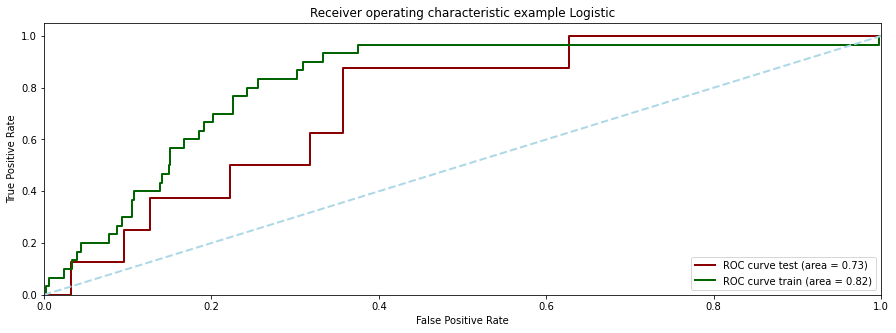

In [44]:
#AUC & Gini Graph + Calculations of splitted logit

fpr_split, tpr_split, thresholds_split = metrics.roc_curve(test_labels, predictions_split)
auc_split = metrics.auc(fpr_split, tpr_split) 

#Predict the in sample (train) data for comparision
fpr_split_train, tpr_split_train, thresholds_split_train = metrics.roc_curve(train_labels, predictions_split_train)
auc_split_train = metrics.auc(fpr_split_train, tpr_split_train)

fig, axes = plt.subplots(figsize=(15,5))
lw = 2
axes = plt.plot(fpr_split, tpr_split, color='darkred',
         lw=lw, label='ROC curve test (area = %0.2f)' % auc_split)
axes = plt.plot(fpr_split_train, tpr_split_train, color='darkgreen',
         lw=lw, label='ROC curve train (area = %0.2f)' % auc_split_train)
axes = plt.plot([0, 1], [0, 1], color='lightblue', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example Logistic')
plt.legend(loc="lower right")

print("Out sample: ")
print('AUC (LY):  ',auc_split)
print('GINI (LY): ', 2*auc_split -1)

In sample: 
AUC L1:   0.806265664160401
GINI L1:  0.612531328320802
AUC L2:   0.806265664160401
GINI L2:  0.612531328320802
Splitted Logit Regression
Out sample: 
AUC Test Sample:   0.7331349206349207
GINI Test Sample:  0.4662698412698414


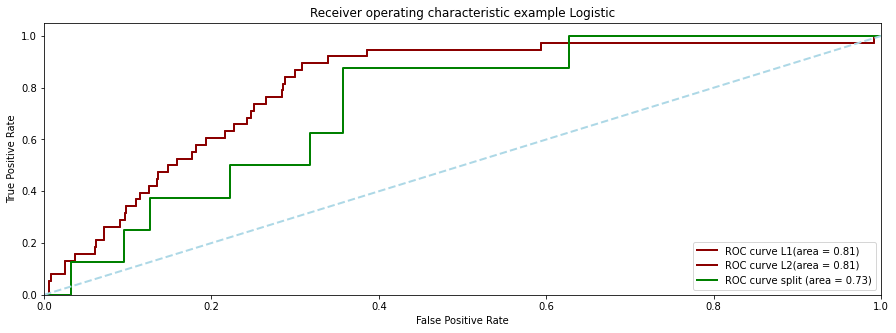

In [45]:
#AUC & Gini Graph + Calculations of old logit regression (red) splitted logit regression (green)
predictions_L1 = mdl1.predict(X)
predictions_L2 = mdl2.predict(X)
#AUC & Gini Graph + Calculations
fpr_L1, tpr_L1, thresholds_L1 = metrics.roc_curve(df_train['default'], predictions_L1)
auc_L1 = metrics.auc(fpr_L1, tpr_L1)

fpr_L2, tpr_L2, thresholds_L2 = metrics.roc_curve(df_train['default'], predictions_L2)
auc_L2 = metrics.auc(fpr_L2, tpr_L2)

fig, axes = plt.subplots(figsize=(15,5))
lw = 2
axes = plt.plot(fpr_L1, tpr_L1, color='darkred',
         lw=lw, label='ROC curve L1(area = %0.2f)' % auc_L1)
axes = plt.plot(fpr_L2, tpr_L2, color='darkred',
         lw=lw, label='ROC curve L2(area = %0.2f)' % auc_L2)
axes = plt.plot(fpr_split, tpr_split, color='green',
         lw=lw, label='ROC curve split (area = %0.2f)' % auc_split)
axes = plt.plot([0, 1], [0, 1], color='lightblue', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example Logistic')
plt.legend(loc="lower right")

print("In sample: ")
print('AUC L1:  ',auc_L1)
print('GINI L1: ', 2*auc_L1 -1)
print('AUC L2:  ',auc_L2)
print('GINI L2: ', 2*auc_L2 -1)
print('Splitted Logit Regression')
print("Out sample: ")
print('AUC Test Sample:  ',auc_split)
print('GINI Test Sample: ', 2*auc_split -1)

Our out of sample Gini here highly depends on the random_state we define in out test and train split. Thus multiple different random states are here simulated. Also the test size here is increased to 0.33 as this will be similiar to the sizes of our train (668 firms) and test (330) firms.

In [46]:
# # Generate random numbers for different states
# #np.random.seed(220497)
# random_numbers = np.random.randint(0,1000000,10000)
# dictionary_random_test = dict()

# for i in random_numbers:
#     try:
#         # Splitting data into training and testing sets.
#         train_features, test_features, train_labels, test_labels = train_test_split(X, 
#                                                                                 y, test_size = 0.33, 
#                                                                                 random_state = i, 
#                                                                                 stratify = y)
#         # The splited Logit Model
#         mdl2split = sm.Logit(train_labels,train_features).fit()
#         mdl2split.summary2()

#         # Predict the test data
#         predictions_split = mdl2split.predict(test_features)
#         # Predict the training data
#         predictions_split_train = mdl2split.predict(train_features)
#         # Calculate the absolute errors
#         errors = abs(predictions_split - test_labels)
    
#         #AUC & Gini Graph + Calculations of splitted logit

#         fpr_split, tpr_split, thresholds_split = metrics.roc_curve(test_labels, predictions_split)
#         auc_split = metrics.auc(fpr_split, tpr_split) 

#         # Predict the in sample (train) data for comparision
#         fpr_split_train, tpr_split_train, thresholds_split_train = metrics.roc_curve(train_labels, predictions_split_train)
#         auc_split_train = metrics.auc(fpr_split_train, tpr_split_train)
    
#         #Store values in dictionary
#         dictionary_random_test[i] = round(np.mean(errors), 2),auc_split,2*auc_split-1, auc_split_train, 2*auc_split_train-1
        
#     except:
#         continue

# dictionary_random_test = pd.DataFrame.from_dict(dictionary_random_test,orient="index",
#                        columns=['MSE','AUC out sample','Gini out of sample',"AUC in sample","Gini in sample"])

# ;

In [ ]:
dictionary_random_test.head()

In [ ]:
dictionary_random_test.describe()

In [ ]:
sns.displot(dictionary_random_test["Gini out of sample"])
plt.title("Distribution of Ginis out of sample");

In [ ]:
sns.displot(dictionary_random_test["Gini in sample"])
plt.title("Distribution of Ginis in sample");

# Random Forest Approach

In [47]:
var_rf = ['profit_margin', 'equity_ratio', 'quick_ratio', 'icr_ratio', 'roa'] #Same as logit 
#var_rf = ['profit_margin', 'equity_ratio', 'quick_ratio', 'icr_ratio', 'roa', 'cash', 'wc_ratio', 'age_num]
y = df_train["default"]
X = df_train[var_rf]

In [48]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier


# Splitting data into training and testing sets.
train_features, test_features, train_labels, test_labels = train_test_split(X, y, test_size = 0.1, random_state = 42, stratify = y)



# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 2000, 
                            criterion='gini',
                            max_depth=None,
                            min_samples_split = 5,
                            min_samples_leaf = 3,
                            max_features='auto',
                            bootstrap=True,
                            oob_score=True,
                            random_state = 0,
                            verbose=0,
                            n_jobs= 2 ,
                            class_weight = 'balanced_subsample')


# Train the model on training data
rf.fit(train_features, train_labels)
rf.score(train_features, train_labels)

0.9983361064891847

In [49]:
# Use the forest's predict method on the test data
predictions_rf = rf.predict(test_features)
predictions_rf_insample = rf.predict(train_features)

predictions_prob = rf.predict_proba(test_features)[:, 1]
predictions_prob_rf_insample = rf.predict_proba(train_features)[:,1]
# Calculate the absolute errors
errors = abs(predictions_rf - test_labels)


# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), '.')

Mean Absolute Error: 0.06 .


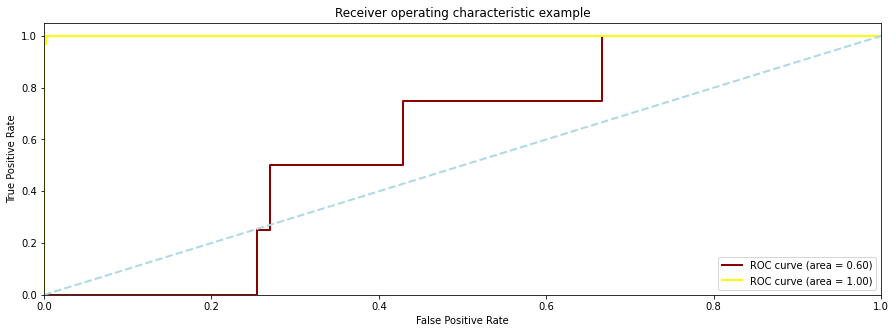

Random Forest Approach
In sample:
AUC :   0.9999481273991078
GINI:  0.9998962547982155
Out sample: 
AUC :   0.5952380952380952
GINI:  0.19047619047619047


In [50]:
predicitons_rf_prob = rf.predict_proba(test_features)[:, 1]

fpr, tpr, thresholds = metrics.roc_curve(test_labels, predicitons_rf_prob)
auc = metrics.auc(fpr, tpr)

#In Sample measurements
fpr_rf_is, tpr_rf_is, thresholds_rf_is = metrics.roc_curve(train_labels, predictions_prob_rf_insample)
auc_rf_is = metrics.auc(fpr_rf_is, tpr_rf_is)

fig, axes = plt.subplots(figsize=(15,5))
lw = 2
axes = plt.plot(fpr, tpr, color='darkred',
         lw=lw, label='ROC curve (area = %0.2f)' % auc)
axes = plt.plot(fpr_rf_is, tpr_rf_is, color='yellow',
         lw=lw, label='ROC curve (area = %0.2f)' % auc_rf_is)        
axes = plt.plot([0, 1], [0, 1], color='lightblue', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

print("Random Forest Approach")
print("In sample:")
print('AUC :  ',auc_rf_is)
print('GINI: ', 2*auc_rf_is -1)
print("Out sample: ")
print('AUC :  ',auc)
print('GINI: ', 2*auc -1)

In [ ]:
weights =np.array([18 if i == 1 else 0.9 for i in train_labels])
# Train the model on training data
#rf.fit(train_features, train_labels, sample_weight = weights)

# Coming to the Test Sample

In [51]:
df_test

,legal_form,zip_code,sector,year_inc,count_emp,type_pl,sales,gross_performance,gross_profit,earn_from_op,...,cf_investment,cf_financing,total_liabilities,age_num,profit_margin,equity_ratio,quick_ratio,icr_ratio,roa,wc_ratio
id,,,,,,,,,,,,,,,,,,,,,
C_411,GmbH,14089,69204,1986,NaN,GKV,7.289467e+05,7.289467e+05,2.097214e+05,45390.50,...,-534.87,-5.457891e+04,214860.19,35.0,0.287705,0.000000,0.045827,6.800931,0.180193,0.525518
C_896,GmbH,13127,87100,1992,181.0,GKV,7.088473e+05,7.088473e+05,7.384952e+05,13017.29,...,-1295.42,-5.820000e-11,380723.43,29.0,1.041825,0.537732,1.160491,12.682473,0.014819,1.425898
C_252,GmbH,14059,86101,1993,505.0,GKV,2.602532e+07,2.601554e+07,2.202299e+07,2086104.36,...,-667342.46,-2.091456e+06,4582487.49,28.0,0.846214,0.367217,0.070284,43.397765,0.061325,3.165258
C_165,GmbH,10437,87100,1995,82.0,GKV,1.105332e+06,1.105332e+06,7.174051e+05,88074.80,...,-57344.11,-1.160000e-10,98099.72,26.0,0.649040,0.790521,1.160491,43.397765,0.182204,3.911569
C_856,GmbH,14943,96090,2002,22.0,GKV,5.199542e+07,5.197990e+07,4.642084e+07,5956777.13,...,-1418555.39,-4.163971e+06,27576629.40,19.0,0.892787,0.160017,0.882230,7.266260,0.121411,2.482512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C_691,GmbH,83435,8930,1994,433.0,GKV,2.224117e+07,2.212290e+07,1.135134e+07,899393.22,...,-3739161.25,1.124341e+06,8211837.02,27.0,0.510375,0.037415,0.182921,2.895516,0.091467,0.734363
C_970,GmbH & Co. KG,89180,10390,1928,NaN,GKV,1.049671e+08,1.049671e+08,1.076738e+08,6771828.14,...,-1331066.79,-1.163975e+07,63957453.47,93.0,1.025786,0.349197,0.152560,43.397765,0.069005,1.467173
C_157,GmbH,82438,46495,1997,NaN,GKV,2.092688e+07,2.092688e+07,5.232887e+06,917317.49,...,-243526.79,-5.370269e+05,4102001.75,24.0,0.250056,0.419103,0.194655,41.309480,0.126808,1.406278


In [52]:
X_test = df_test[['profit_margin', 'equity_ratio', 'quick_ratio', 'icr_ratio', 'roa']]
X_test = sm.add_constant(X) #weiß nicht ob man das mochen soll/ bei den PDs ändert sich nichts

#X.loc['C_712','ocf_ratio'] = 0
#X.loc['C_712']

In [53]:
prediction = pd.DataFrame(mdl1.predict(X_test))
x = round(prediction*100,2)

In [54]:
x.describe()

,0
count,668.000000
mean,5.688862
std,5.421456
min,0.010000
25%,0.977500
50%,4.540000
75%,8.962500
max,30.810000


In [55]:
x.sort_values(by=0,ascending=False)

,0
544,30.81
209,27.73
13,24.38
351,23.54
375,20.49
...,...
522,0.01
468,0.01
462,0.01
258,0.01


In [56]:
df_test.loc["C_712"] #der geht nicht

legal_form                        GmbH
zip_code                         78056
sector                           26119
year_inc                          1954
count_emp                           93
type_pl                            GKV
sales                      7.29882e+07
gross_performance          7.43735e+07
gross_profit               3.31588e+07
earn_from_op                 6.165e+06
fin_result                     -447509
oth_interest_inc               60211.8
oth_interest_exp                507721
result_from_ord_bus        5.71749e+06
total_result               5.60547e+06
annual_profit              5.29181e+06
total_assets               2.79705e+07
total_liabilities_st       1.09504e+07
total_liabilities_mt                 0
total_liabilities_lt       7.04987e+06
bank_liabilities_st                NaN
bank_liabilities_mt                NaN
bank_liabilities_lt                NaN
trade_payables_st          3.11138e+06
trade_payables_mt                  NaN
trade_payables_lt        

## Random Forest Export

In [57]:
#X_test = sm.add_constant(X) #weiß nicht ob man das mochen soll/ bei den PDs ändert sich nichts
X_rf = X_test.copy()
i_ndex = X.index
#X_rf = X.reset_index()
#X_rf = X_rf.set_index('id')
#X_rf = X_rf.drop('id', axis=1)
X_rf.replace([np.inf, -np.inf], np.nan, inplace=True)
#X_rf = np.array(X_rf)

In [58]:
X_rf.replace(np.nan, 0, inplace=True)
#np.where(np.isnan(X_rf))

In [59]:
y_RF = pd.DataFrame(rf.predict(X_rf),columns={'Default'},index=i_ndex)
y_RF_prob = pd.DataFrame(rf.predict_proba(X_rf),index=i_ndex)
y_RF_prob = round(y_RF_prob*100,2)

y_RF_prob.sort_values(by=1, ascending=False)

ValueError: Number of features of the model must match the input. Model n_features is 5 and input n_features is 6 

In [60]:
y_RF.sort_values(by='Default',ascending=False)
y_RF.describe()

NameError: name 'y_RF' is not defined

In [61]:
train_RF = pd.concat([y_RF, y_RF_prob], axis=1)
train_RF

NameError: name 'y_RF' is not defined

 # Export
 the Data as a CSV file for the Upload
  

In [ ]:
#train_RF.to_csv("trained_RF-Approach.csv")

In [ ]:
 #x.to_csv("trained_Logit-Approach.csv")